In [1]:
import cv2
from matplotlib import pyplot as plt
import os
import numpy as np
import keras
import tensorflow as tf
import glob

Using TensorFlow backend.


In [2]:
classes = 17

In [3]:
def get_im(path):
    # Load as grayscale
    img = cv2.imread(path, 0)
    return img

In [4]:
# to show image
def show_img(img):
    plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
    plt.show()

In [5]:
def load_train():
    X_train = []
    y_train = []
    p = "/root/alpha/git/mine/tensor/dataset/train"
    for j in range(1,classes):
        path = os.path.join(p , str(j)+"/*")
        files = glob.glob(path)
        for fl in files:
            img = get_im(fl)
            X_train.append(img)
            y_train.append(j-1)

    return X_train, y_train

In [6]:
def load_test():
    X_train = []
    y_train = []
    p = "/root/alpha/git/mine/tensor/dataset/test"
    for j in range(1,classes):
        path = os.path.join(p , str(j)+"t/*")
        files = glob.glob(path)
        for fl in files:
            img = get_im(fl)
            X_train.append(img)
            y_train.append(j-1)

    return X_train, y_train

In [7]:
x,y = load_train()
tx , ty = load_test()

In [8]:
x = np.array(x)
y = np.array(y)
ty = np.array(ty)
tx = np.array(tx)
x = x.astype(float) / 255
tx = tx.astype(float) / 255

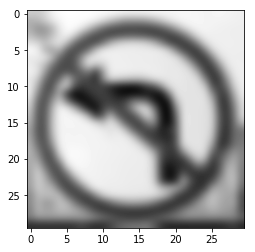

270

In [9]:
show_img(tx[77])
len(x)

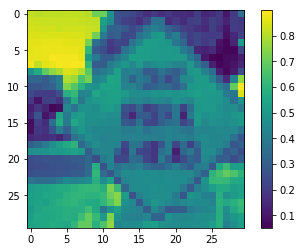

In [10]:
plt.figure()
plt.imshow(tx[50])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(30,30)),
    keras.layers.Dense(640, activation=tf.nn.relu),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(16, activation=tf.nn.softmax)
])

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
model.fit(x, y, epochs=25)

W0927 23:06:57.568970 139828624152384 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/dist-packages/keras/backend/tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Epoch 1/25
270/270 [==============================] - 0s 857us/step - loss: 2.8038 - accuracy: 0.1556
Epoch 2/25
270/270 [==============================] - 0s 344us/step - loss: 2.3667 - accuracy: 0.3111
Epoch 3/25
270/270 [==============================] - 0s 343us/step - loss: 1.9669 - accuracy: 0.4333
Epoch 4/25
270/270 [==============================] - 0s 308us/step - loss: 1.6094 - accuracy: 0.5333
Epoch 5/25
270/270 [==============================] - 0s 259us/step - loss: 1.3023 - accuracy: 0.6815
Epoch 6/25
270/270 [==============================] - 0s 290us/step - loss: 1.1260 - accuracy: 0.7185
Epoch 7/25
270/270 [==============================] - 0s 322us/step - loss: 0.9739 - accuracy: 0.7556
Epoch 8/25
270/270 [==============================] - 0s 328us/step - loss: 0.8813 - accuracy: 0.7667
Epoch 9/25
270/270 [==============================] - 0s 272us/step - loss: 0.7409 - accuracy: 0.8222
Epoch 10/25
270/270 [==============================] - 0s 260us/step - loss: 0.696

In [18]:
loss, acc = model.evaluate(tx, ty)

print('Test accuracy:', acc)

80/80 [==============================] - 0s 60us/step
Test accuracy: 0.762499988079071


In [19]:
predictions = model.predict(tx)
len(predictions)

80

In [16]:
np.argmax(predictions[49])

9

In [17]:
for i in range(0,80):
    print("{a:2d}".format(a=i)+": "+"{a:2d}".format(a=ty[i])+" >>> "+str(np.argmax(predictions[i])))

 0:  0 >>> 0
 1:  0 >>> 0
 2:  0 >>> 0
 3:  0 >>> 0
 4:  0 >>> 0
 5:  1 >>> 1
 6:  1 >>> 1
 7:  1 >>> 1
 8:  1 >>> 1
 9:  1 >>> 1
10:  2 >>> 2
11:  2 >>> 8
12:  2 >>> 10
13:  2 >>> 2
14:  2 >>> 2
15:  3 >>> 3
16:  3 >>> 3
17:  3 >>> 14
18:  3 >>> 6
19:  3 >>> 3
20:  4 >>> 4
21:  4 >>> 4
22:  4 >>> 4
23:  4 >>> 4
24:  4 >>> 9
25:  5 >>> 5
26:  5 >>> 5
27:  5 >>> 5
28:  5 >>> 5
29:  5 >>> 5
30:  6 >>> 2
31:  6 >>> 6
32:  6 >>> 6
33:  6 >>> 6
34:  6 >>> 3
35:  7 >>> 9
36:  7 >>> 7
37:  7 >>> 2
38:  7 >>> 7
39:  7 >>> 7
40:  8 >>> 8
41:  8 >>> 8
42:  8 >>> 8
43:  8 >>> 8
44:  8 >>> 8
45:  9 >>> 9
46:  9 >>> 9
47:  9 >>> 9
48:  9 >>> 9
49:  9 >>> 9
50: 10 >>> 10
51: 10 >>> 10
52: 10 >>> 10
53: 10 >>> 10
54: 10 >>> 9
55: 11 >>> 13
56: 11 >>> 11
57: 11 >>> 14
58: 11 >>> 11
59: 11 >>> 11
60: 12 >>> 12
61: 12 >>> 12
62: 12 >>> 12
63: 12 >>> 12
64: 12 >>> 12
65: 13 >>> 13
66: 13 >>> 11
67: 13 >>> 0
68: 13 >>> 11
69: 13 >>> 15
70: 14 >>> 11
71: 14 >>> 14
72: 14 >>> 11
73: 14 >>> 14
74: 14 >>> 14
